## **Machine Learning Attempt 1: Decision Tree**

In this notebook, we make our first attempt at machine learning with a decision tree, to see if our model can be further improved.

In [6]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [7]:
cat_preds = pd.read_csv("datasets\\categorical-predictors.csv")
cat_preds = cat_preds[['Sex', 'Pclass', 'Embarked', 'Alone', 'Survived']]
cat_preds.head()

,Sex,Pclass,Embarked,Alone,Survived
0,male,3,S,0,0
1,female,1,C,0,1
2,female,3,S,1,1
3,female,1,S,0,1
4,male,3,S,1,0


In [8]:
num_preds = pd.read_csv("datasets\\numeric-predictors.csv")
num_preds = num_preds[['Fare', 'Parch', 'Family_Size']]
num_preds.head()

,Fare,Parch,Family_Size
0,7.2500,0,2
1,71.2833,0,2
2,7.9250,0,1
3,53.1000,0,2
4,8.0500,0,1


In [10]:
machine_learning_data = pd.concat([num_preds, cat_preds], axis=1)
machine_learning_data.head()

,Fare,Parch,Family_Size,Sex,Pclass,Embarked,Alone,Survived
0,7.2500,0,2,male,3,S,0,0
1,71.2833,0,2,female,1,C,0,1
2,7.9250,0,1,female,3,S,1,1
3,53.1000,0,2,female,1,S,0,1
4,8.0500,0,1,male,3,S,1,0


From our EDA, we have selected the following predictors for response variable `Survived`: 

`Fare`, `Parch`, `Family_Size`, `Sex`, `Pclass`, `Embarked`, `Alone`

In [11]:
machine_learning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fare         891 non-null    float64
 1   Parch        891 non-null    int64  
 2   Family_Size  891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Pclass       891 non-null    int64  
 5   Embarked     891 non-null    object 
 6   Alone        891 non-null    int64  
 7   Survived     891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


Before we can start feeding data into machine learning, we would have to convert some of the columns to numerical values. The two data that does not have numercial value is `Sex` and `Embarked`. Hence we will be using onehotencoder to convert these columns.

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

machine_learning_data_cat = machine_learning_data[['Sex', 'Embarked']]
ohe.fit(machine_learning_data_cat)
machine_learning_data_cat_ohe = pd.DataFrame(ohe.transform(machine_learning_data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(machine_learning_data_cat.columns))

machine_learning_data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex_female  891 non-null    float64
 1   Sex_male    891 non-null    float64
 2   Embarked_C  891 non-null    float64
 3   Embarked_Q  891 non-null    float64
 4   Embarked_S  891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


In [13]:
machine_learning_data_num = machine_learning_data[['Pclass', 'Alone', 'Fare', 'Parch', 'Family_Size']]
machine_learning_data_res = machine_learning_data['Survived']
machine_learning_data_ohe = pd.concat([machine_learning_data_num, machine_learning_data_cat_ohe, machine_learning_data_res], 
                           sort = False, axis = 1).reindex(index=machine_learning_data_num.index)


machine_learning_data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Alone        891 non-null    int64  
 2   Fare         891 non-null    float64
 3   Parch        891 non-null    int64  
 4   Family_Size  891 non-null    int64  
 5   Sex_female   891 non-null    float64
 6   Sex_male     891 non-null    float64
 7   Embarked_C   891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
 10  Survived     891 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 76.7 KB


In [14]:
machine_learning_data_ohe.head()

,Pclass,Alone,Fare,Parch,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,0,7.2500,0,2,0.0,1.0,0.0,0.0,1.0,0
1,1,0,71.2833,0,2,1.0,0.0,1.0,0.0,0.0,1
2,3,1,7.9250,0,1,1.0,0.0,0.0,0.0,1.0,1
3,1,0,53.1000,0,2,1.0,0.0,0.0,0.0,1.0,1
4,3,1,8.0500,0,1,0.0,1.0,0.0,0.0,1.0,0


We have managed to successfully convert them to columns with numerical value.

Since we are predicting a categorical variable with both numeric and categorical predictors, we have decided to use a decision tree.

[Text(0.45535714285714285, 0.9, 'Sex_male <= 0.5\ngini = 0.477\nsamples = 623\nvalue = [378, 245]\nclass = 0'),
 Text(0.19642857142857142, 0.7, 'Pclass <= 2.5\ngini = 0.355\nsamples = 212\nvalue = [49, 163]\nclass = 1'),
 Text(0.10714285714285714, 0.5, 'Fare <= 28.856\ngini = 0.081\nsamples = 118\nvalue = [5, 113]\nclass = 1'),
 Text(0.07142857142857142, 0.3, 'Fare <= 28.217\ngini = 0.187\nsamples = 48\nvalue = [5, 43]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'gini = 0.156\nsamples = 47\nvalue = [4, 43]\nclass = 1'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 70\nvalue = [0, 70]\nclass = 1'),
 Text(0.2857142857142857, 0.5, 'Family_Size <= 4.5\ngini = 0.498\nsamples = 94\nvalue = [44, 50]\nclass = 1'),
 Text(0.21428571428571427, 0.3, 'Embarked_S <= 0.5\ngini = 0.463\nsamples = 77\nvalue = [28, 49]\nclass = 1'),
 Text(0.17857142857142858, 0.1, 'gini = 0.301\nsamples = 38\nvalue = [7, 3

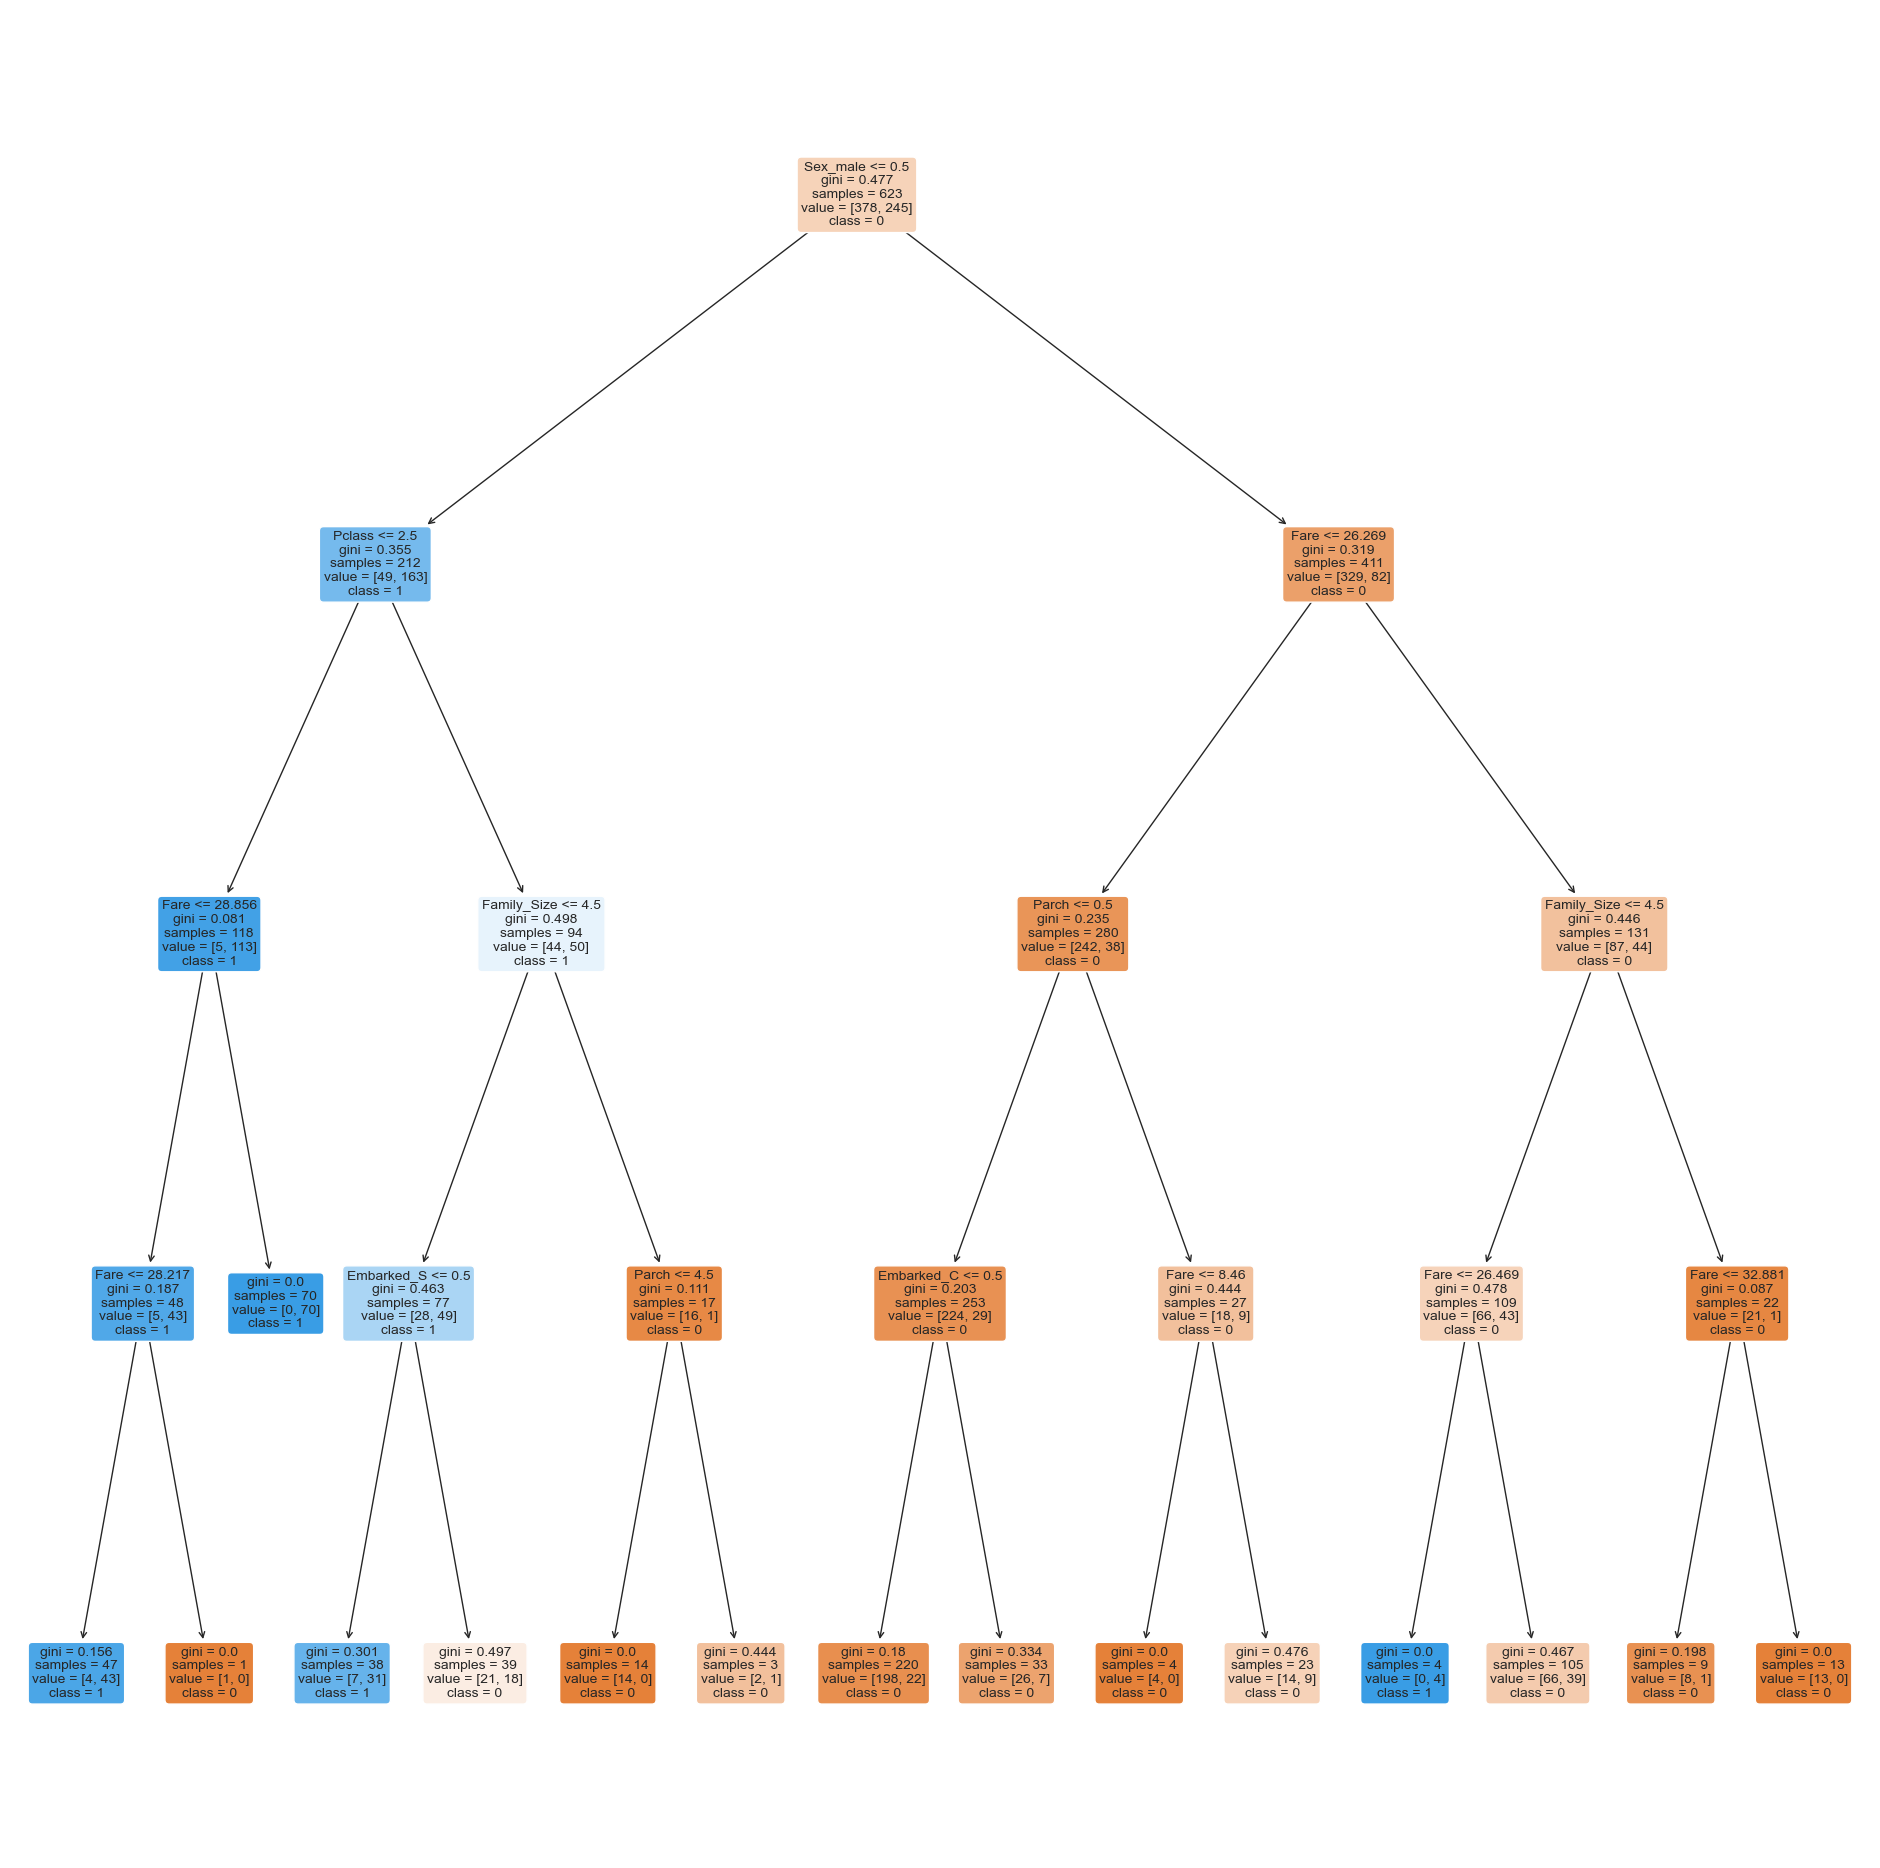

In [15]:
y = pd.DataFrame(machine_learning_data_ohe['Survived'])
X = pd.DataFrame(machine_learning_data_ohe.drop('Survived', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)  

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

Train Data
Accuracy  :	 0.826645264847512

TPR Train :	 0.6040816326530613
TNR Train :	 0.9708994708994709

FPR Train :	 0.0291005291005291
FNR Train :	 0.39591836734693875


<AxesSubplot:>

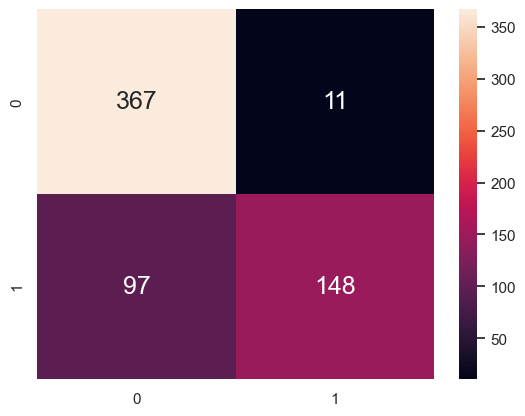

In [16]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()


cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7985074626865671

TPR Test :	 0.5773195876288659
TNR Test :	 0.9239766081871345

FPR Test :	 0.07602339181286549
FNR Test :	 0.422680412371134


<AxesSubplot:>

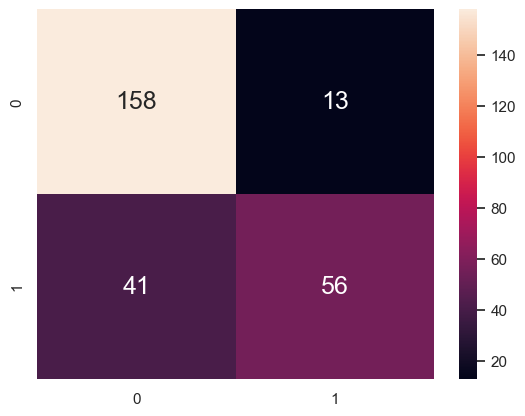

In [17]:
from sklearn.metrics import confusion_matrix

y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

We can see that the overall accuracy for the train dataset is quite high at 82.6% with the FPR at 2.9% and the FNR rate at 39.5%. As for the test dataset, the overall accuracy is at 79.8%, FPR at 7.6% and the FNR rate at 42.2%. As we can see, the FNR rate is pretty high for both the test and train data. This could possibly be due to the imbalanced data as we have majority of the people not surviving, hence majority of the data are being classified as did not survive. Hence we can try to improve this by upscaling the data for people who did survived.

In [19]:
machine_learning_data_ohe.to_csv("datasets\\machine-learning-data-ohe.csv")

The OneHotEncoded machine learning data has been exported to the `machine-learning-data-ohe.csv` in the `datasets` folder.